# Dynamical Systems Visualization Pt 2:
# Continuous Systems with multiple independent variables

<br>**Enrico Borriello**</br>
<br>School of Complex Adaptive System</br>
<br>Arizona State University</br>
<br></br>
<br>**Latest update:** Sept 4, 2021</br>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

There's no optimal way of visualizing quantities depending on multiple independent variables. We've seen that -as long as time is the only one- the number of dynamic/dependent variables doesn't usually pose a serious obstacle to effective visualization. Selecting subsets of dynamic variables and plotting them vs. time in separate charts doesn't hide any information. This is no longer true when dealing with multiple independent variables. In this case, selecting only some independent variables means fixing the values of the remaining ones. This way we are just plotting a *cross section* of the actual graph.

We can still overcome the problem when dealing with just 2 independent variables, for example time and one spatial coordinate $x$, by using 3D plots. But this only allows us to add one more variable.

Let's see this in practice, using the solution to the diffusion equation we've studied in Module 5 (*Stochastic Systems*). The probability $\rho(x,t)$ of finding our random walker in $x$ at $t$  can be written as

$$ \rho(x,t) = \frac{1}{\sqrt{4 \pi D t}}\exp(-\frac{x^2}{4 D t})  $$

where $D$ is the diffusion constant, and we've assumed the walker to be in $x=0$ at $t=0$ (see textbook).

In [22]:
def rho(D,x,t):
    return np.exp(-x**2/4/D/t)/np.sqrt(4*np.pi*D*t)

In [23]:
x_range = np.linspace(-10,10,1000)
t_range = np.linspace(0.1,5,100)

x, t = np.meshgrid(x_range, t_range)
r = rho(1,x,t)  # we have set D = 1

Defined this way, **r** is a 2D array where **r[i]** is the value of $\rho(x,t)$ for varying values of $x$ in **x_range** and $t =$ **t_range[i]**.

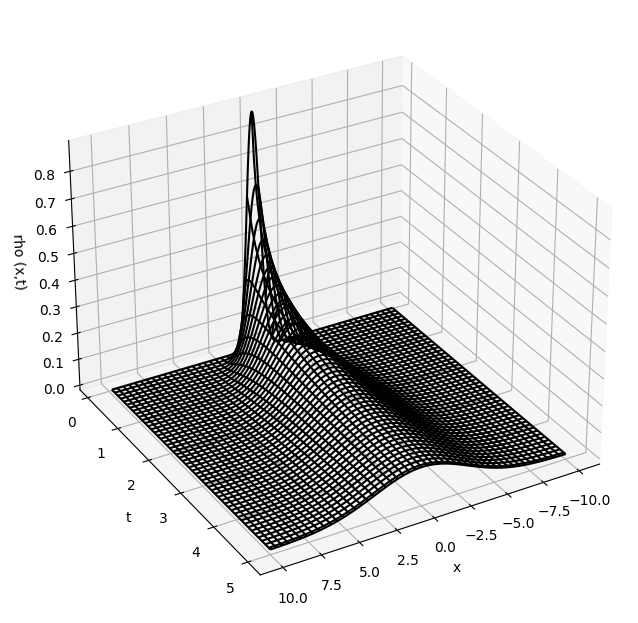

In [24]:
fig = plt.figure(figsize=(20,8), dpi= 100, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')
ax.plot_wireframe(x, t, r, color='black')
ax.view_init(30, 60)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('rho (x,t)')
plt.show()

As it wont't always be possible to plot the full graph, most of the times, we will have to select sections.
For example:

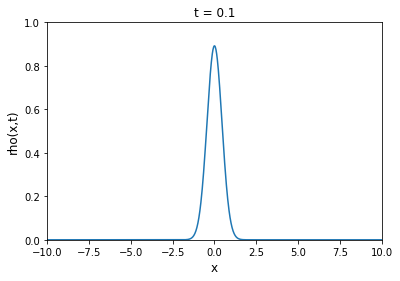

In [25]:
plt.plot(x_range,r[0])
plt.xlim(-10,10)
plt.ylim(0,1)
plt.title('t = '+str(round(t_range[0], 2)))
plt.xlabel('x',size=12)
plt.ylabel('rho(x,t)',size=12)
plt.show()

As time is completently absent in this plot, we need to visualize the dynamics by superposing these plots of $\rho(x,t)$ as a function of $x$ for consecutive values of $t$:

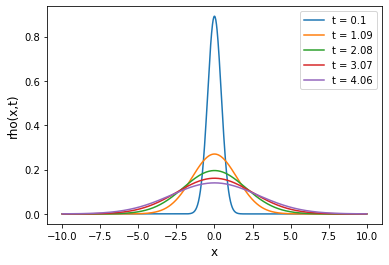

In [26]:
selected_times = t_range[::20]
selected_rho = r[::20]
for i in range(len(selected_times)):
    plt.plot(x_range,selected_rho[i],label = 't = '+str(round(selected_times[i], 2)))
    plt.xlabel('x',size=12)
    plt.ylabel('rho(x,t)',size=12)
plt.legend()
plt.show()

This is among the very few options we have when we need to collect our data in one, static pictures.

A better approach consists in producing an animation. Of course this option can't be used in printed papers, but it's the most udeful way of representing a dynamics whenever videos are an option. Python can directly generate videos. But we can also use just the simple Python functions we already know, plus an external video editor.

We begin by generating individual pictures at different times, and save them (in a directory called 'figures' in the following lines of code). Generating our sequence of pictures could take some minutes.

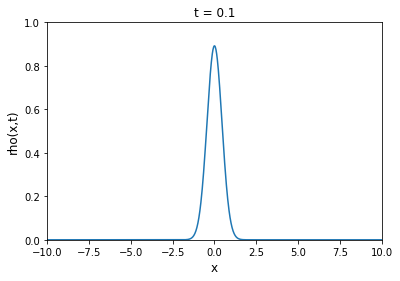

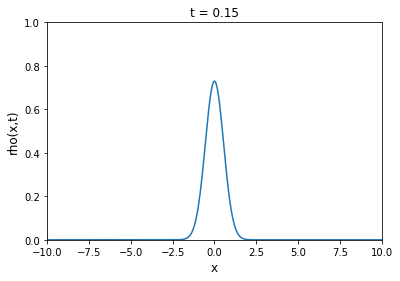

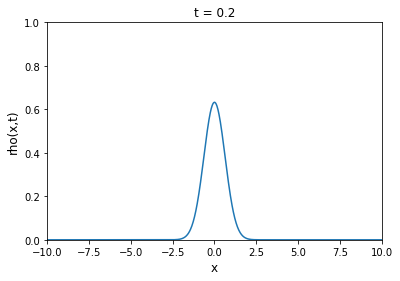

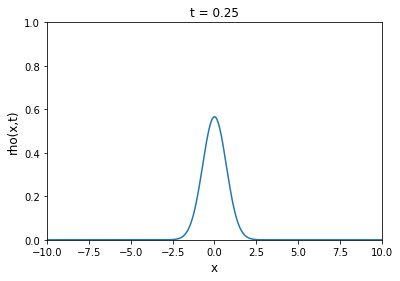

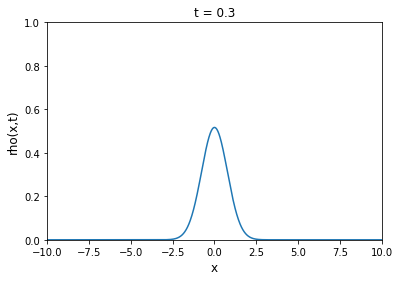

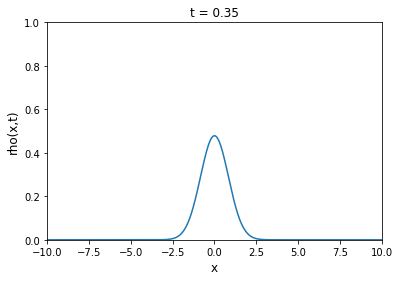

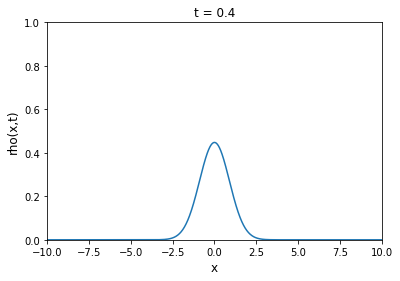

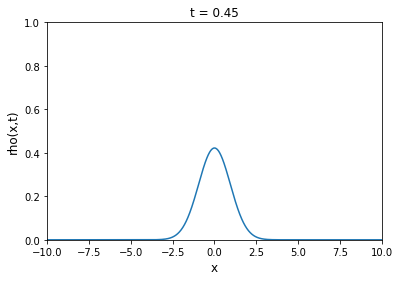

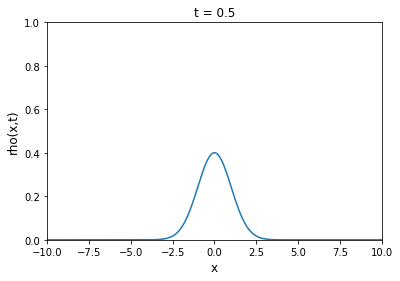

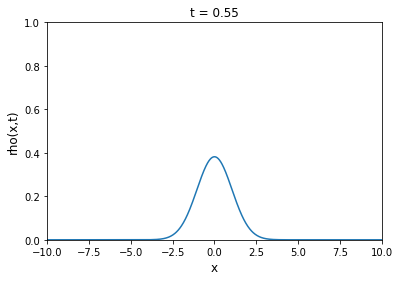

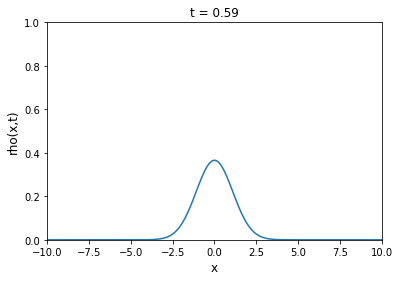

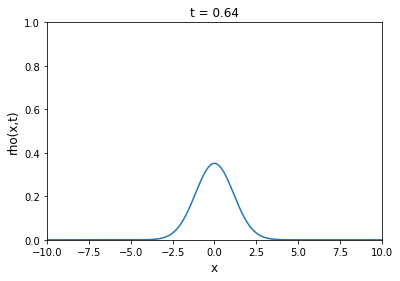

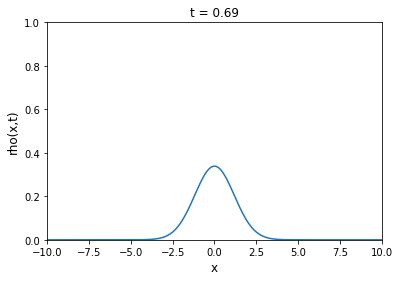

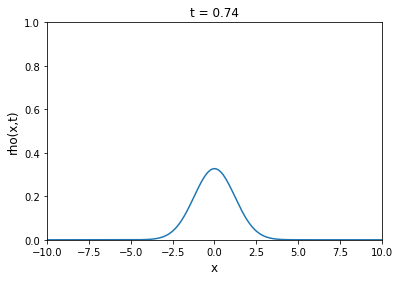

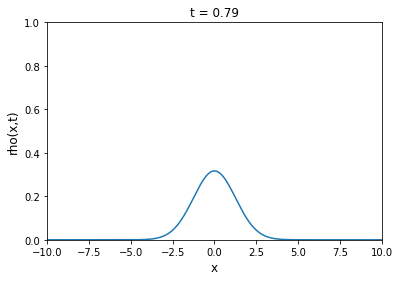

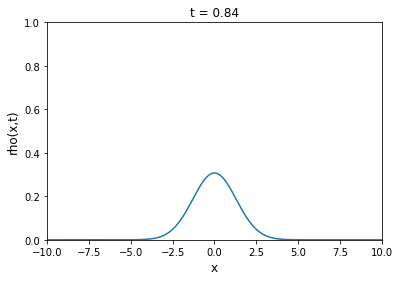

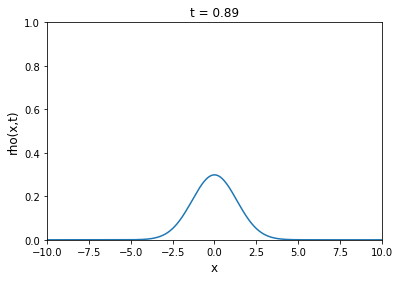

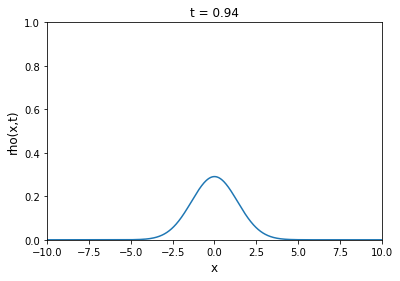

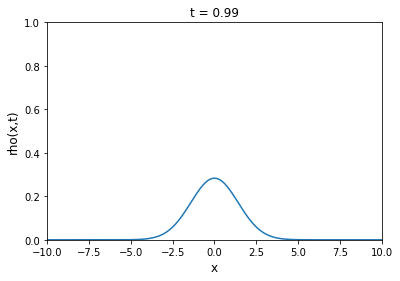

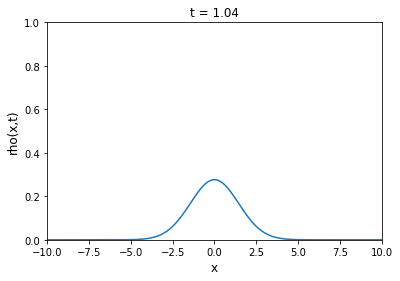

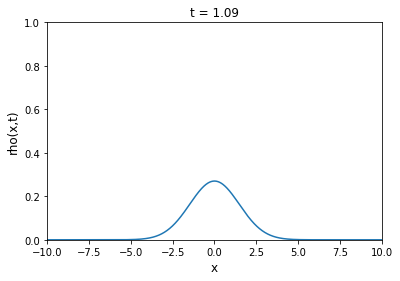

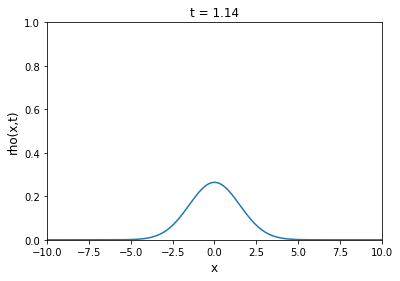

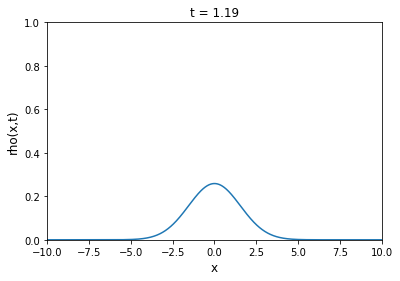

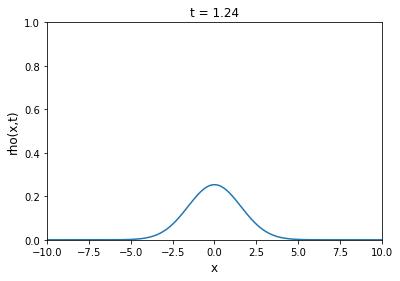

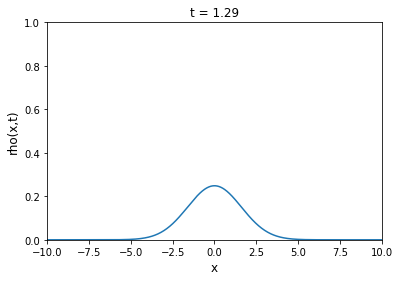

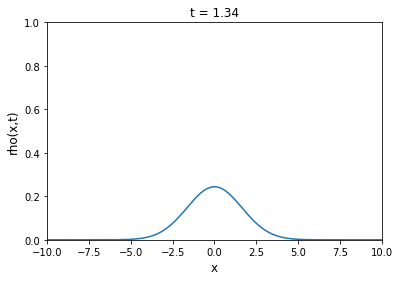

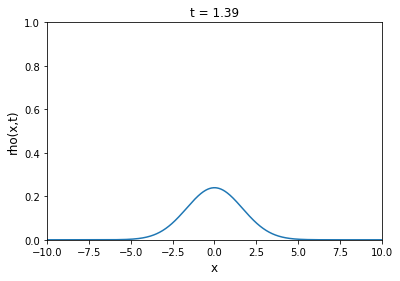

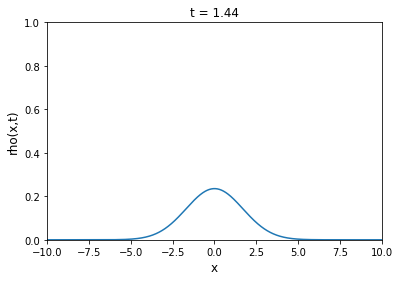

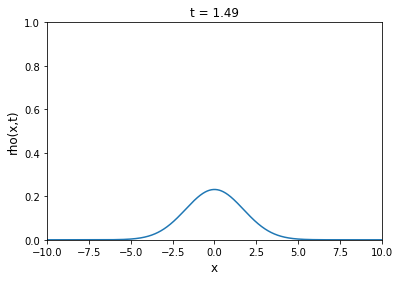

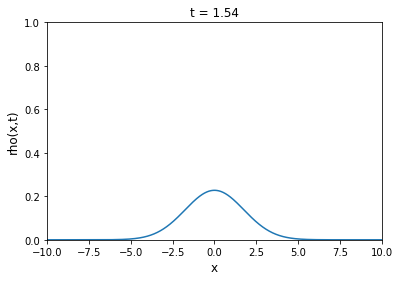

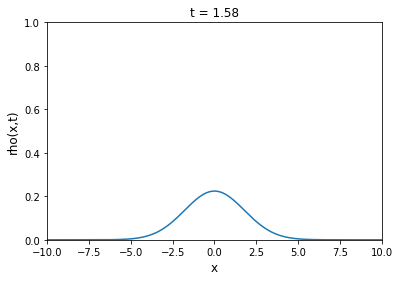

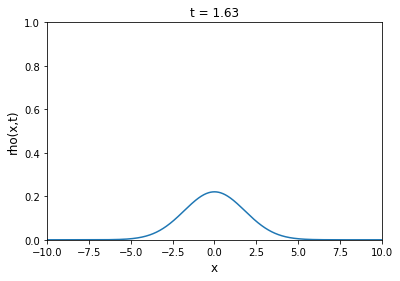

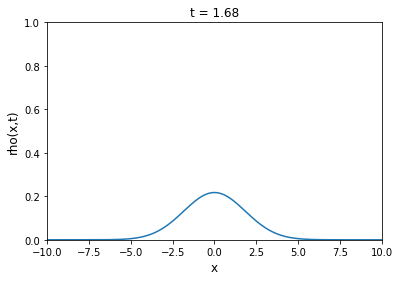

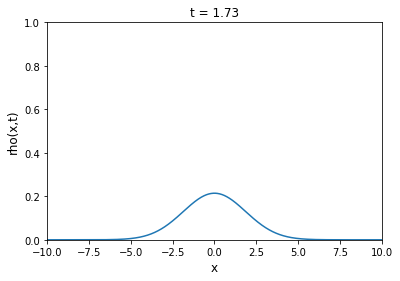

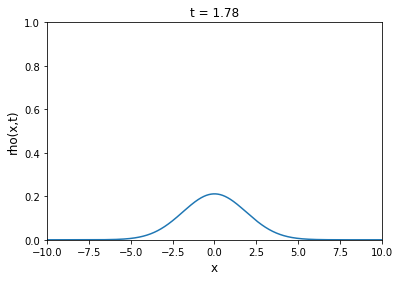

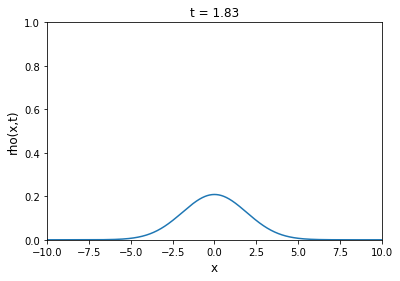

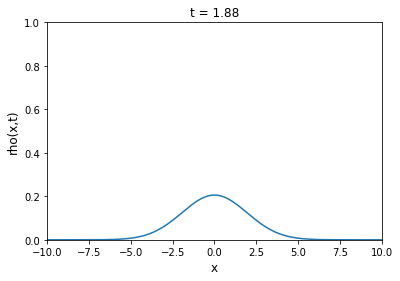

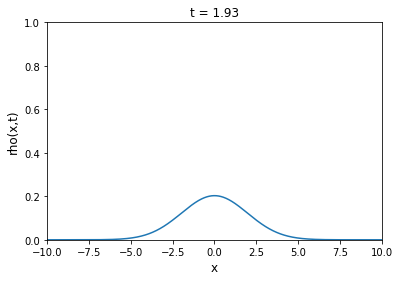

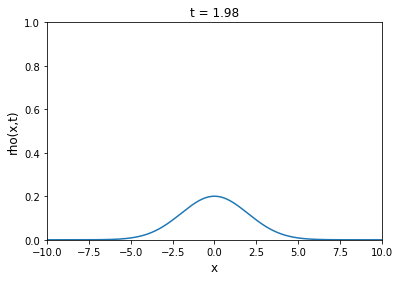

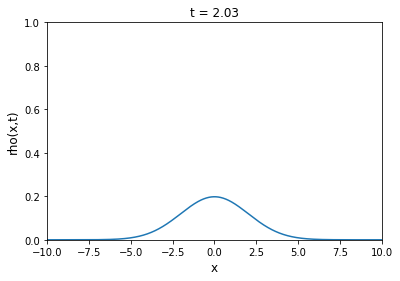

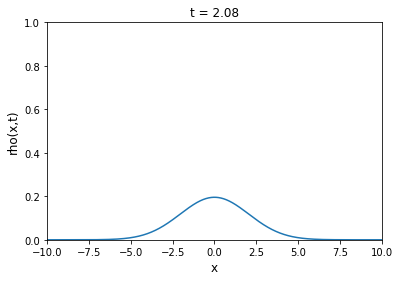

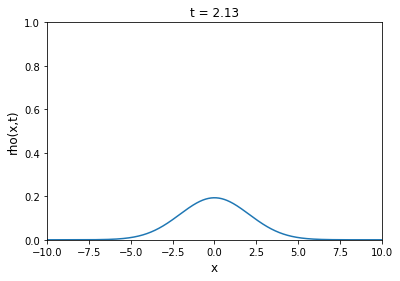

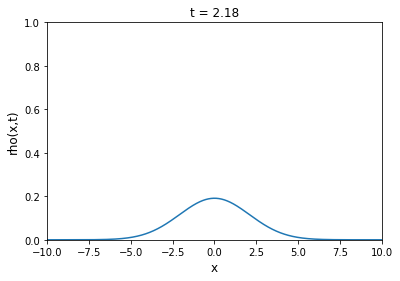

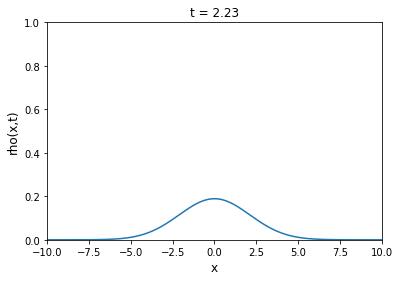

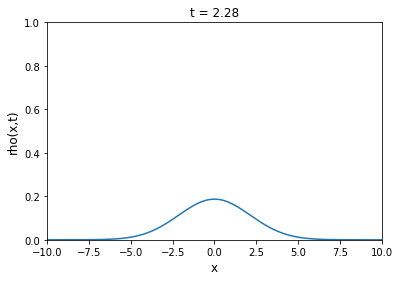

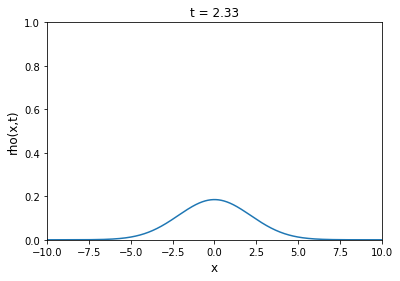

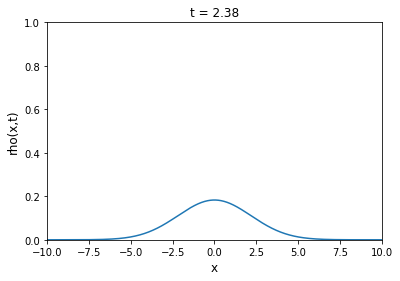

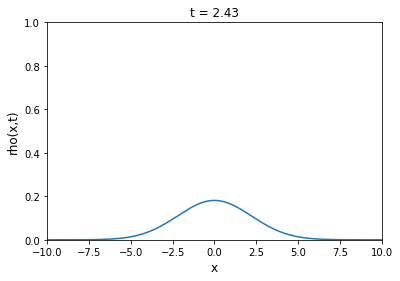

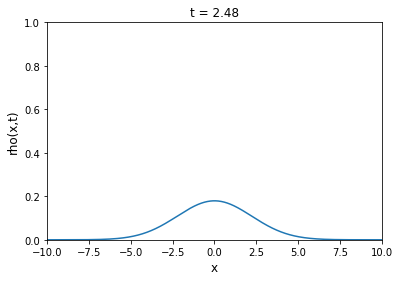

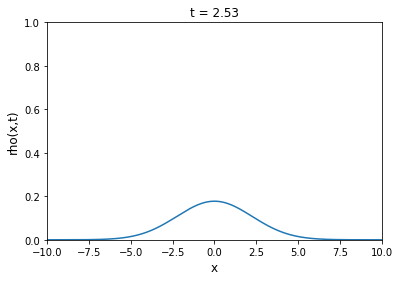

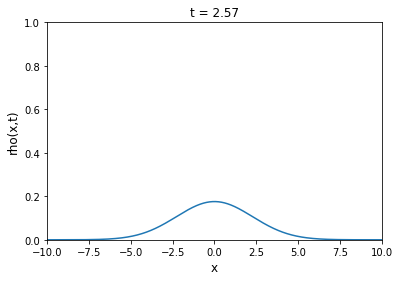

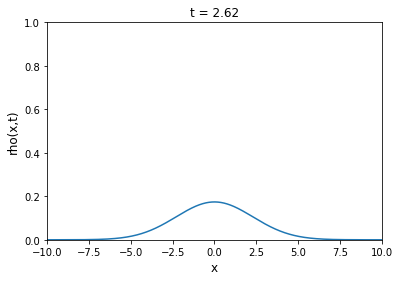

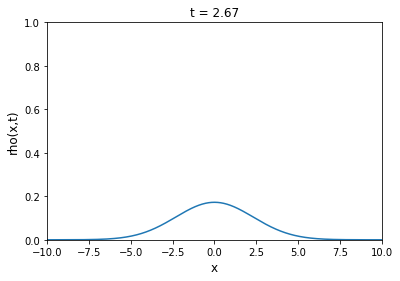

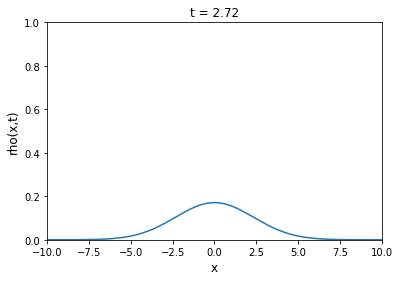

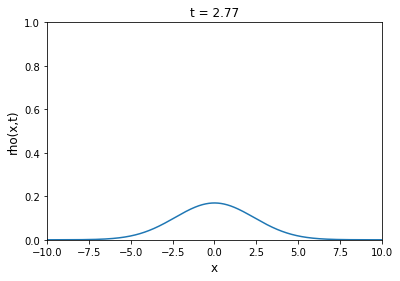

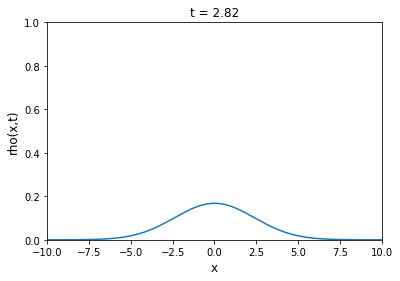

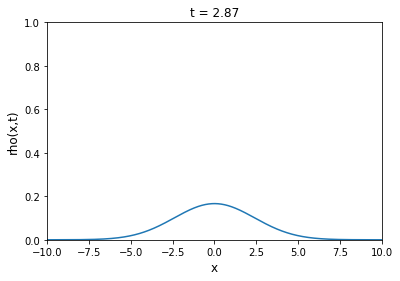

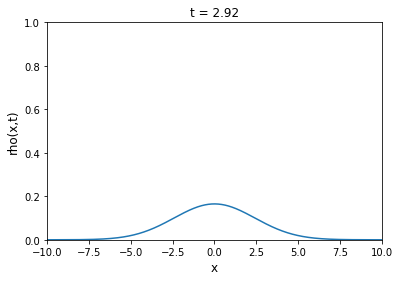

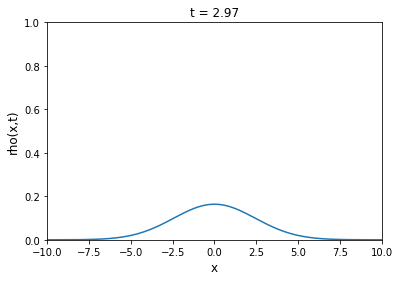

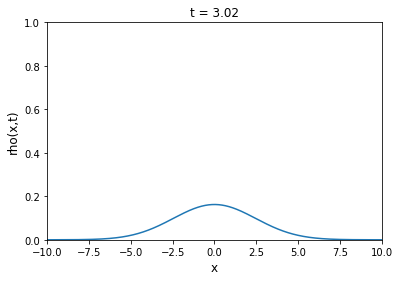

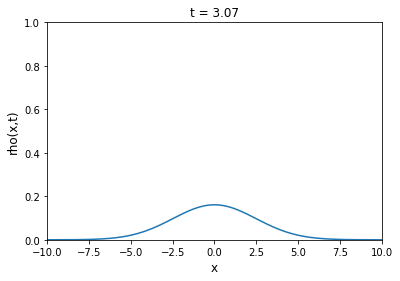

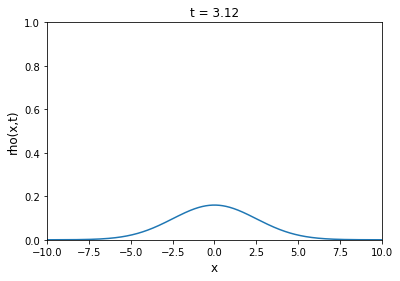

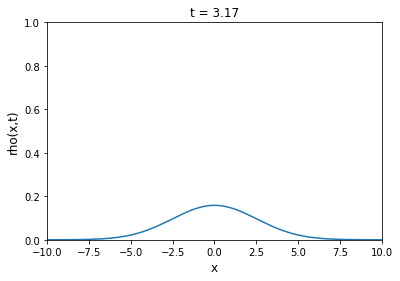

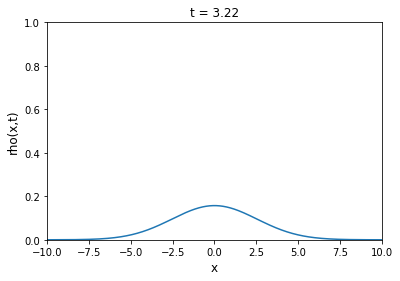

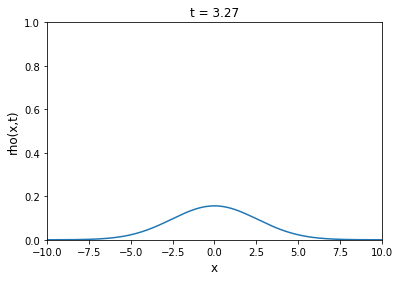

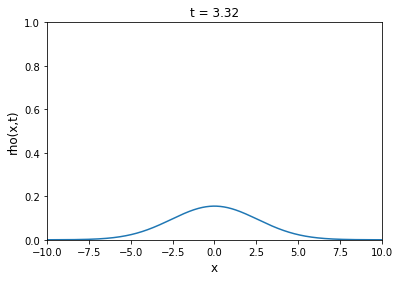

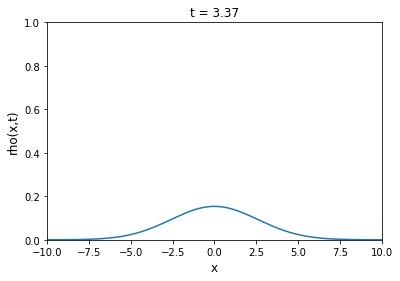

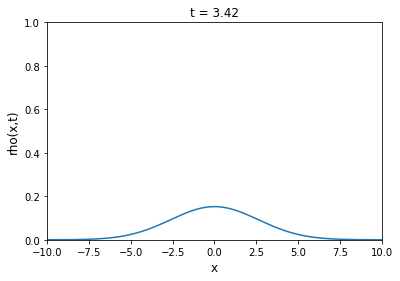

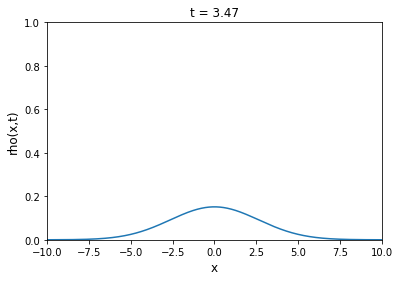

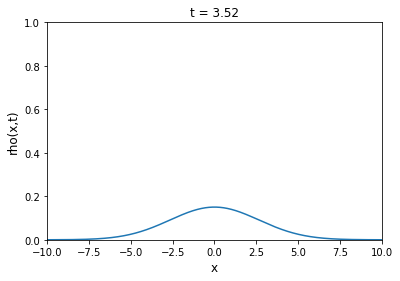

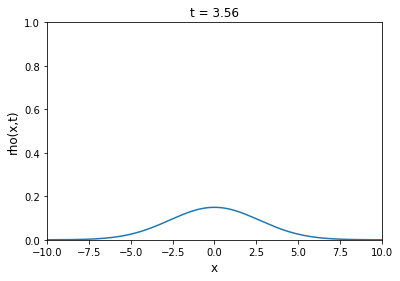

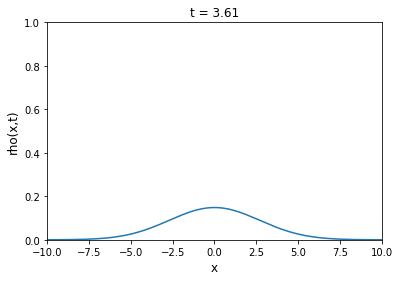

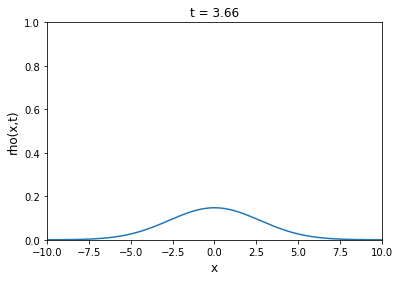

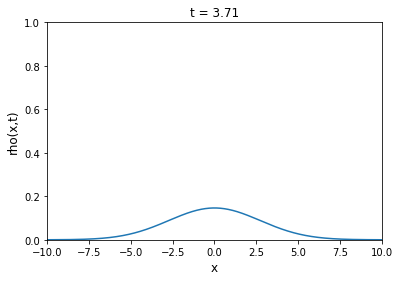

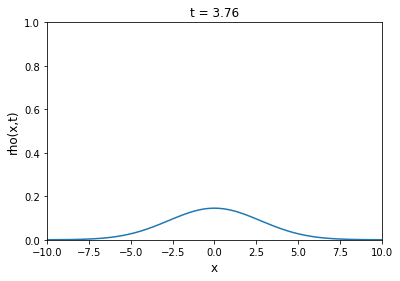

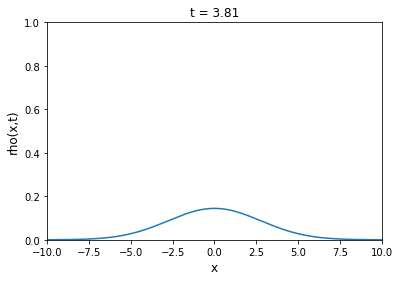

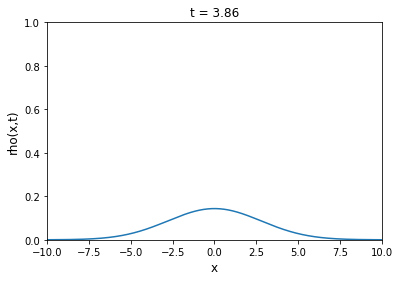

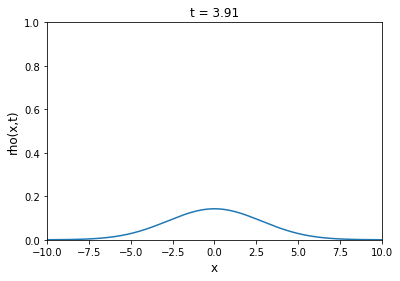

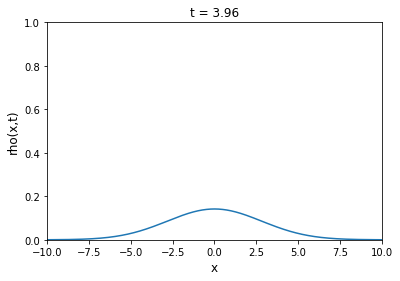

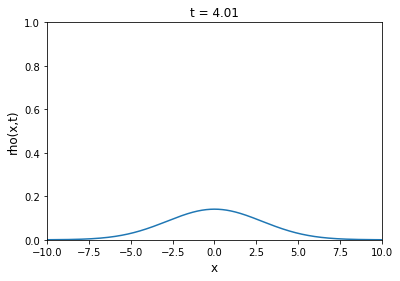

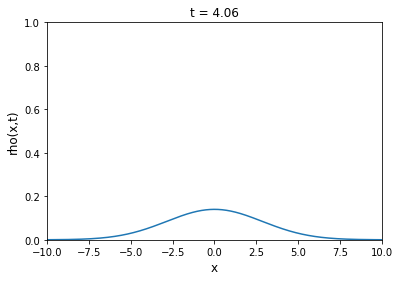

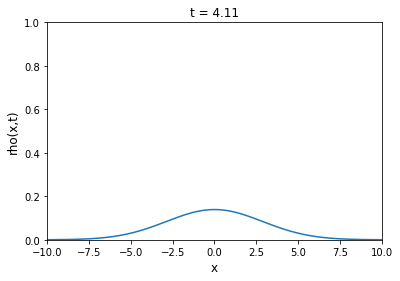

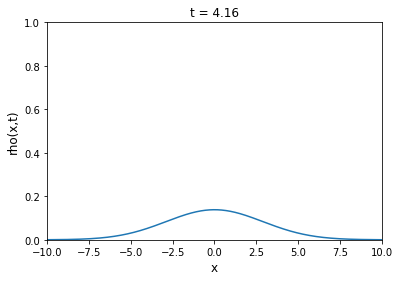

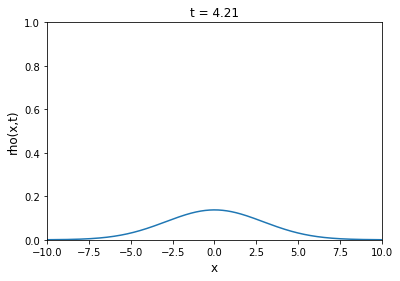

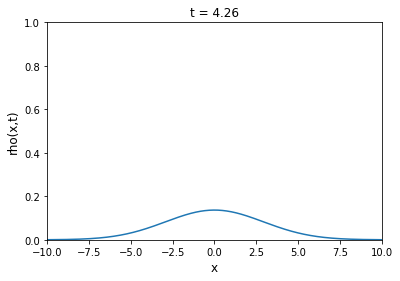

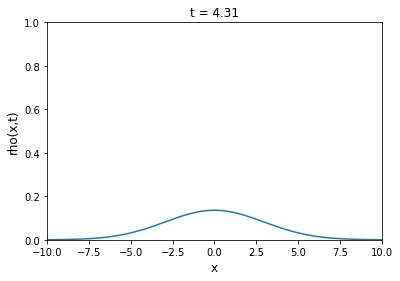

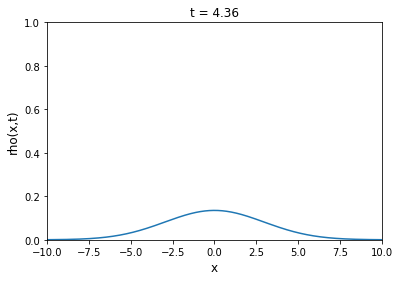

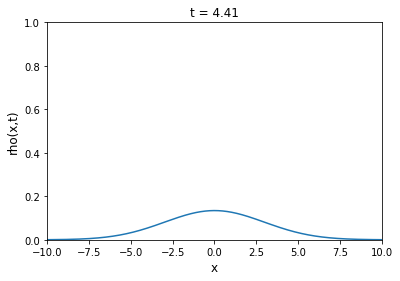

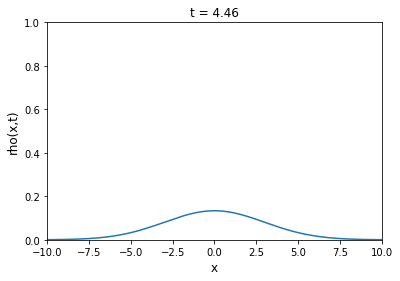

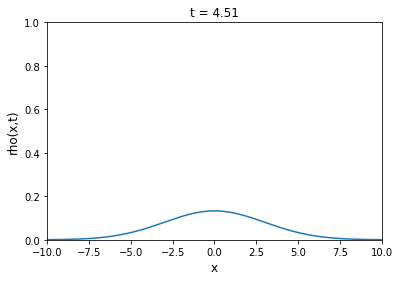

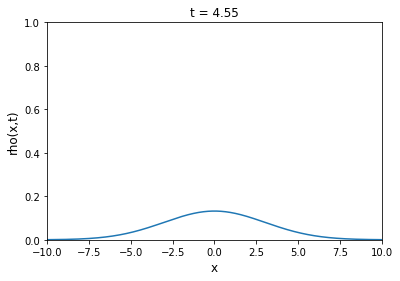

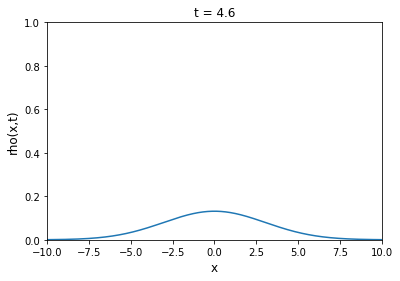

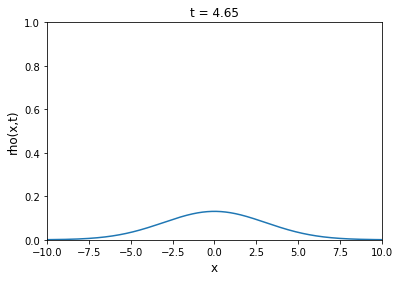

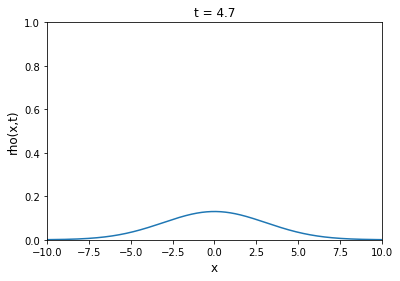

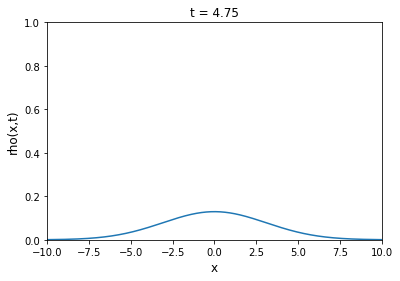

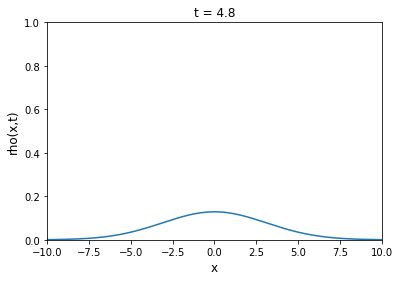

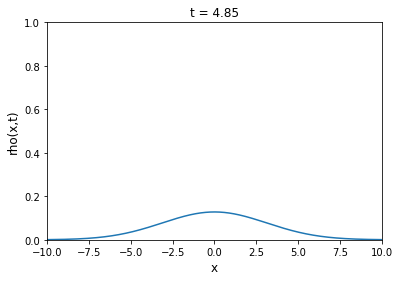

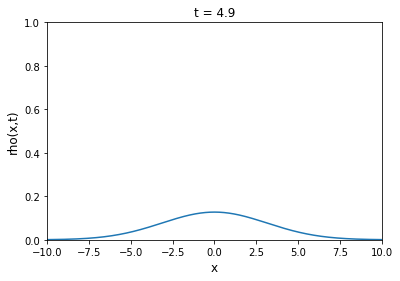

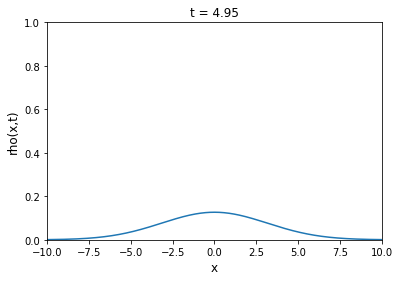

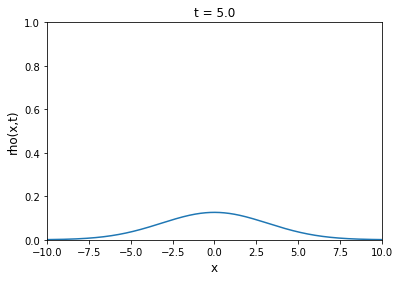

In [28]:
for i in range(len(t_range)):
    plt.plot(x_range,r[i])
    plt.xlim(-10,10)
    plt.ylim(0,1)
    plt.title('t = ' + str(round(t_range[i], 2)) )
    plt.xlabel('x',size=12)
    plt.ylabel('rho(x,t)',size=12)
    plt.savefig('figures/rho_t_' + str(round(t_range[i], 2)) + '.jpg' , dpi=300)
    plt.show()

Once we have our pictures, we can then use an external editor to combine them into a video. As a side note, it's extremely easy to open a video within a Juyter notebook. Here's the video obtained using the pictures we just generated: 

In [30]:
from IPython.display import Video
Video("diffusion.mp4", width=512)

**A note about time:** Notice that we're not making any distinction between continuous and discrete time systems. That distinction only exists in the model we use to determine the time series of our dynamic variables. To generate these, we need to select discrete values of time even if we were treating it as a continuous quantity in our model.